### Renormalized Density

In [143]:
import numpy as np
from scipy.optimize import root_scalar
import matplotlib.pyplot as plt

def F(x):
    if 1 >= x >= -1:
        return 1
    else:
        return 0
    
def rho_hk(mu, t, U):
    if F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 1:
        return (np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                (np.arccos(mu / (2 * t)) + np.arccos((mu - U) / (2 * t))))
    elif F(mu / (2 * t)) == 1 and F((mu - U) / (2 *t)) == 0:
        return (np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                np.arccos(mu / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 1:
        return (np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1) - (1 / np.pi) * 
                np.arccos((mu - U) / (2 * t)))
    elif F(mu / (2 * t)) == 0 and F((mu - U) / (2 *t)) == 0:
        return np.heaviside(mu + 2*t, 1) + np.heaviside(mu - U + 2 * t, 1)
    
def rho_meanfield(rho, mu, t, U, f_0):
    return rho - rho_hk(mu - f_0 * rho, t, U)

def find_rho(mu, t, U, f_0, bracket=(0, 2)):
    ziel = lambda rho: rho_meanfield(rho, mu, t, U, f_0)
    result = root_scalar(ziel, bracket=bracket, method='brentq')

    if result.converged:
        return result.root
    else:
        raise RuntimeError(f"Keine Nullstelle gefunden für mu={mu}")
    
def one_plot(x_array, y_array,x_label, y_label, title, file_name):
    plt.figure(dpi=200)
    # Plot erstellen
    plt.plot(x_array, y_array, linestyle='-')
    
    # Achsenbeschriftungen und Titel
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
#    plt.savefig(f'Plots/{file_name}.png')
    plt.show()

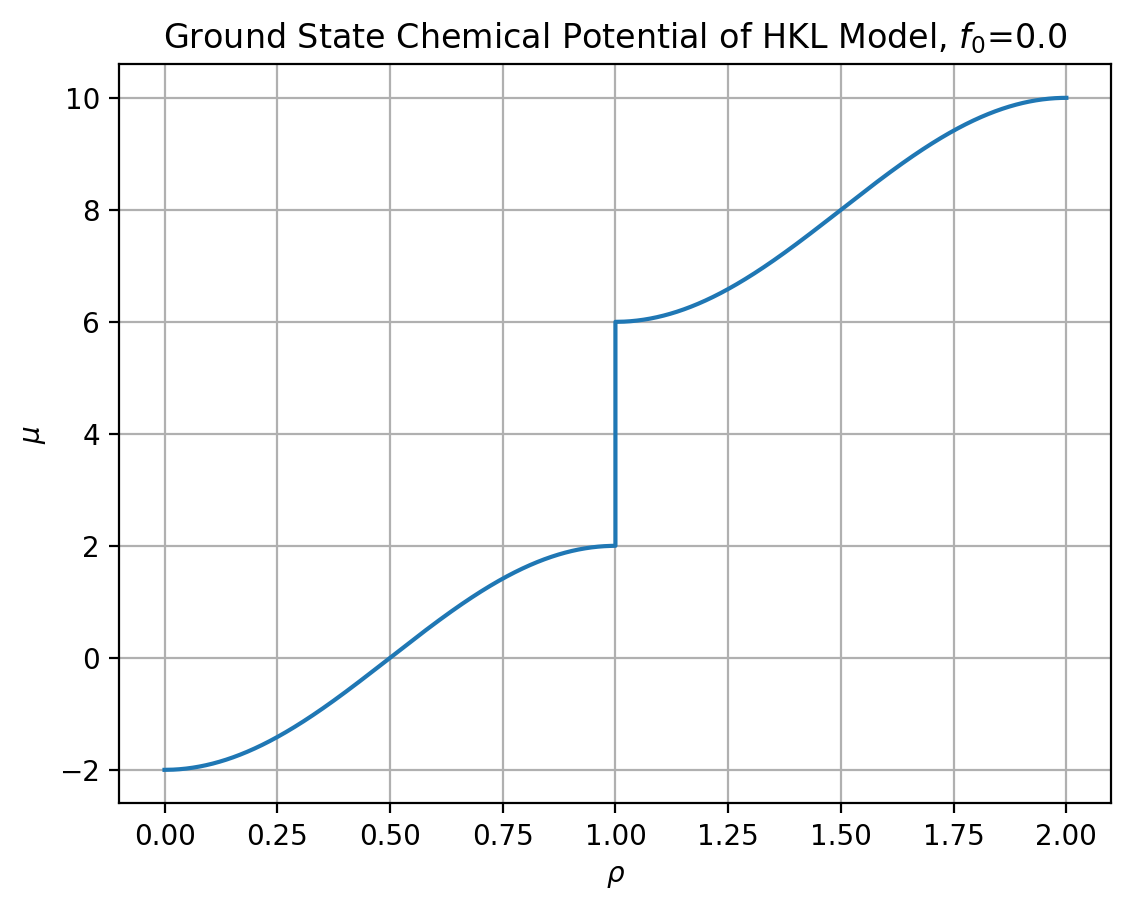

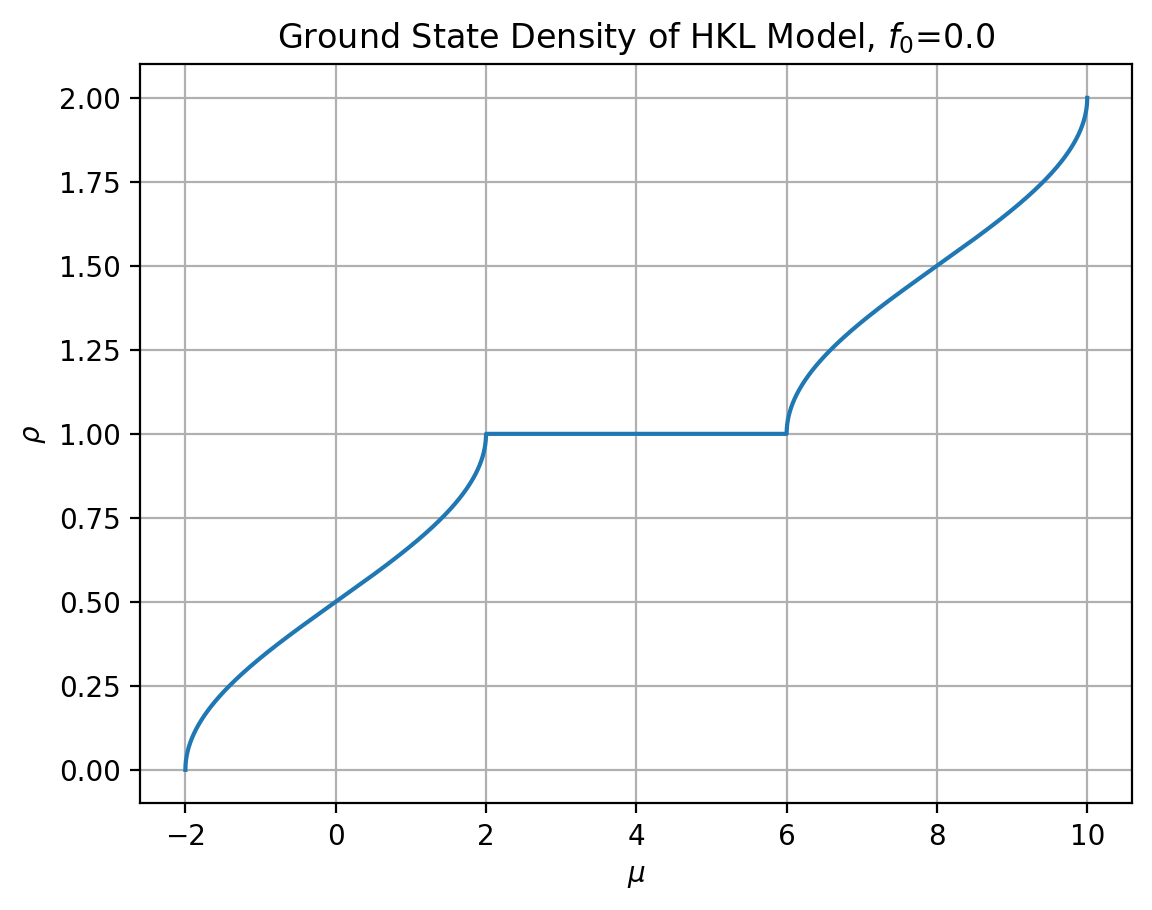

In [147]:
t = 1.0
U = 8.0
f_0 = 0.0
mu_values = np.linspace(-2, U + 2 + 2 * f_0, 10000)
rho_values = []
f_0_str = r'$f_0$'

for mu in mu_values:
    try:
        rho = find_rho(mu, t, U, f_0)
        rho_values.append(rho)
    except RuntimeError:
        rho_values.append(np.nan)

# mu as function of rho
one_plot(rho_values, mu_values, r'$\rho$', r'$\mu$', f'Ground State Chemical Potential of HKL Model, {f_0_str}={f_0}', f'mu_as_rho_U{U}_f{f_0}')

# rho as function of mu
one_plot(mu_values, rho_values, r'$\mu$', r'$\rho$', f'Ground State Density of HKL Model, {f_0_str}={f_0}', f'rho_as_mu_U{U}_f{f_0}')

### Renormalized Compressibility

/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_2008/962145801.py:5: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 / (np.sqrt(4 * (t ** 2) - mu**2)) * (1 / np.pi)
/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_2008/962145801.py:12: RuntimeWarning: invalid value encountered in scalar multiply
  return kappa_hk(mu - f_0 * rho, t, U) / (1 + f_0 * kappa_hk(mu - f_0 * rho,t ,U))
/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_2008/962145801.py:3: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2)) + 1 / (np.sqrt(4 * (t ** 2) - mu**2))) * (1 / np.pi)
/var/folders/6g/kfvfxvvs2473z8z47g0kr34w0000gn/T/ipykernel_2008/962145801.py:7: RuntimeWarning: divide by zero encountered in scalar divide
  return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2))) * (1 / np.pi)


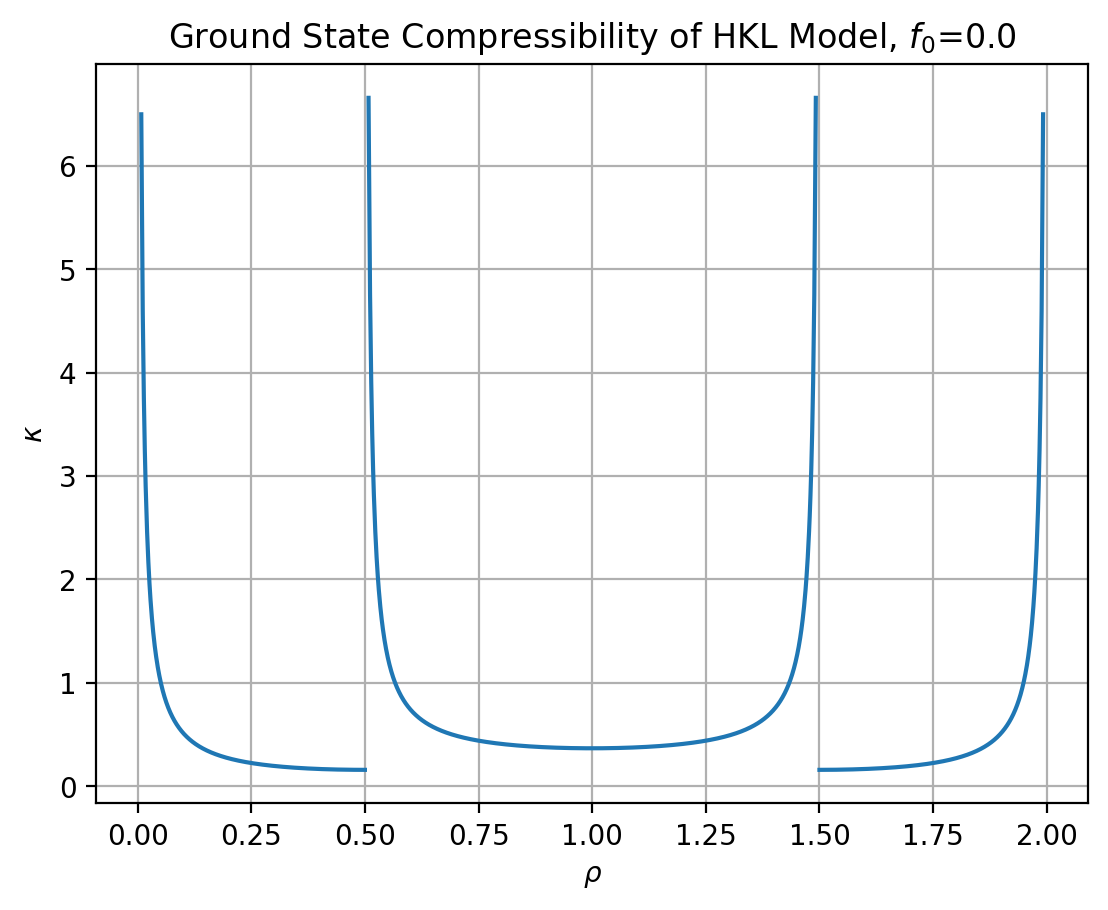

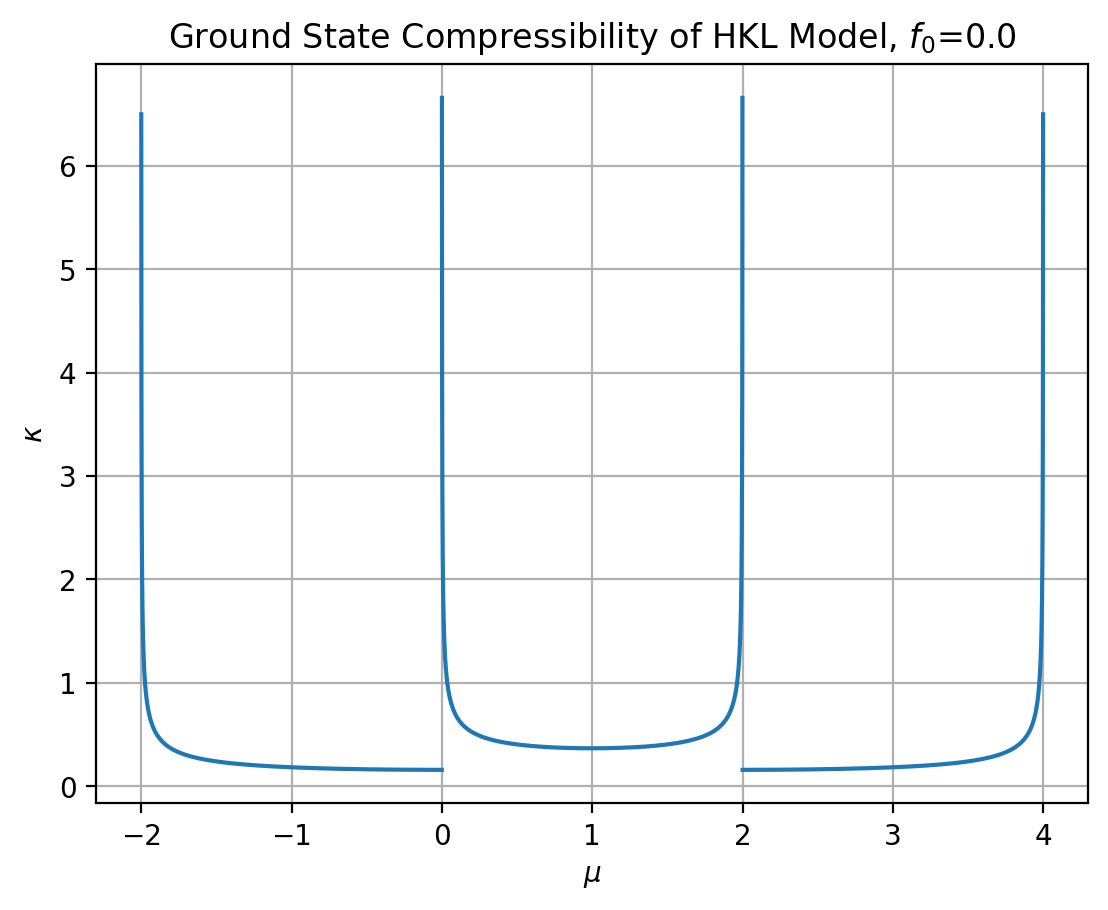

In [145]:
def kappa_hk(mu, t, U):
    if F((mu - U) / (2 * t)) == 1 and F(mu / (2 * t)) == 1:
        return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2)) + 1 / (np.sqrt(4 * (t ** 2) - mu**2))) * (1 / np.pi)
    elif F((mu - U) / (2 * t)) == 0 and F(mu / (2 * t)) == 1:
        return 1 / (np.sqrt(4 * (t ** 2) - mu**2)) * (1 / np.pi)
    elif F((mu - U) / (2 * t)) == 1 and F(mu / (2 * t)) == 0:
        return (1 / (np.sqrt(4 * (t ** 2) - (mu - U)**2))) * (1 / np.pi)
    elif F((mu - U) / (2 * t)) == 0 and F(mu / (2 * t)) == 0:
        return 0
    
def kappa_meanfield(rho, mu, t, U, f_0):
    return kappa_hk(mu - f_0 * rho, t, U) / (1 + f_0 * kappa_hk(mu - f_0 * rho,t ,U))

kappa_values = []
for i in range(len(mu_values)):
    try:
        kappa_mu = kappa_meanfield(rho_values[i], mu_values[i], t, U, f_0)
        kappa_values.append(kappa_mu)
    except RuntimeError:
        kappa_values.append(np.nan)  
        
# kappa as function of rho
one_plot(rho_values, kappa_values, r'$\rho$', r'$\kappa$', f'Ground State Compressibility of HKL Model, {f_0_str}={f_0}', f'kap_as_rho_U{U}_f{f_0}')

# kappa as function of mu
one_plot(mu_values, kappa_values, r'$\mu$', r'$\kappa$', f'Ground State Compressibility of HKL Model, {f_0_str}={f_0}', f'kap_as_mu_U{U}_f{f_0}')